# Data Loading and Preprocessing
Load the CSV file, parse dates, handle missing or anomalous values (e.g. -1 as missing), and prepare the time series data for modeling.

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'sunspot.csv'
df = pd.read_csv(file_path)
df.head()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1


In [3]:
df.isnull().sum()

Year                        0
Month                       0
Day                         0
Date In Fraction Of Year    0
Number of Sunspots          0
Standard Deviation          0
Observations                0
Indicator                   0
dtype: int64

In [4]:
# Convert Year, Month, and Day to Date column
df['Date'] = pd.to_datetime(
    dict(year=df['Year'], month=df['Month'], day=df['Day'])
)

# Set the Date column as index
df = df.reset_index(drop=True)

# Display the first few rows of the dataframe
df.head()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator,Date
0,1818,1,1,1818.001,-1,-1.0,0,1,1818-01-01
1,1818,1,2,1818.004,-1,-1.0,0,1,1818-01-02
2,1818,1,3,1818.007,-1,-1.0,0,1,1818-01-03
3,1818,1,4,1818.010,-1,-1.0,0,1,1818-01-04
4,1818,1,5,1818.012,-1,-1.0,0,1,1818-01-05


In [5]:
df.tail()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator,Date
75660,2025,2,24,2025.149,164,16.0,20,0,2025-02-24
75661,2025,2,25,2025.152,166,22.5,18,0,2025-02-25
75662,2025,2,26,2025.155,124,18.6,21,0,2025-02-26
75663,2025,2,27,2025.158,130,20.8,26,0,2025-02-27
75664,2025,2,28,2025.160,117,20.0,29,0,2025-02-28


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75665 entries, 0 to 75664
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year                      75665 non-null  int64         
 1   Month                     75665 non-null  int64         
 2   Day                       75665 non-null  int64         
 3   Date In Fraction Of Year  75665 non-null  float64       
 4   Number of Sunspots        75665 non-null  int64         
 5   Standard Deviation        75665 non-null  float64       
 6   Observations              75665 non-null  int64         
 7   Indicator                 75665 non-null  int64         
 8   Date                      75665 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 5.2 MB


# **Data Visualisation**
Plot the raw time series data to understand trends and seasonality, using libraries such as matplotlib or seaborn.

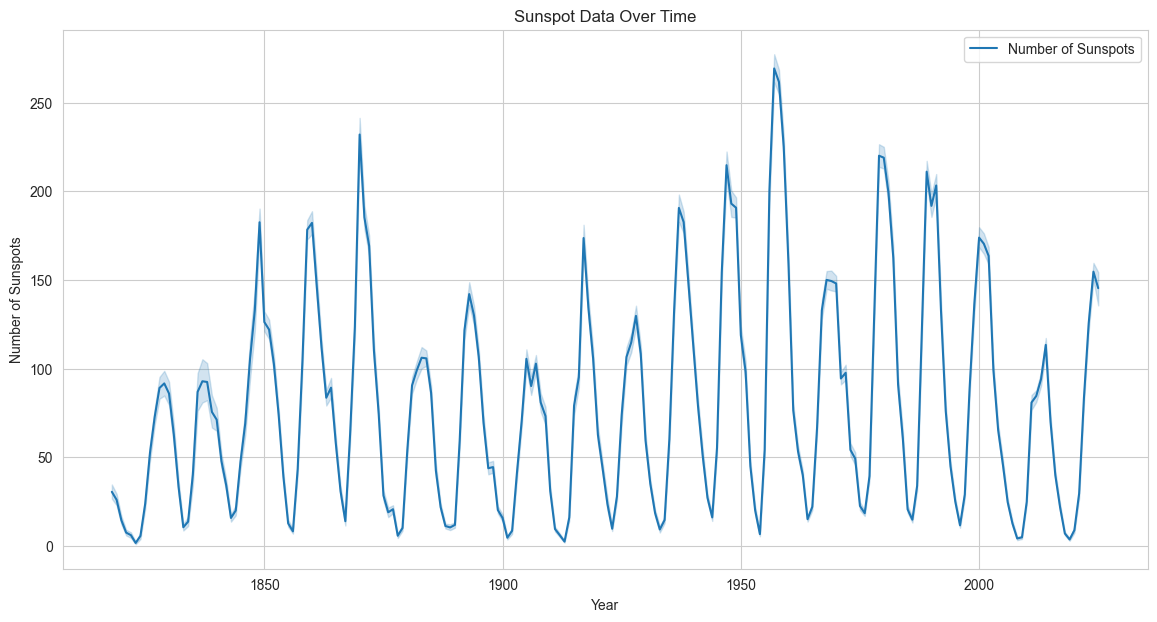

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the raw time series data using Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Number of Sunspots', data=df, label='Number of Sunspots')
plt.title('Sunspot Data Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.show()

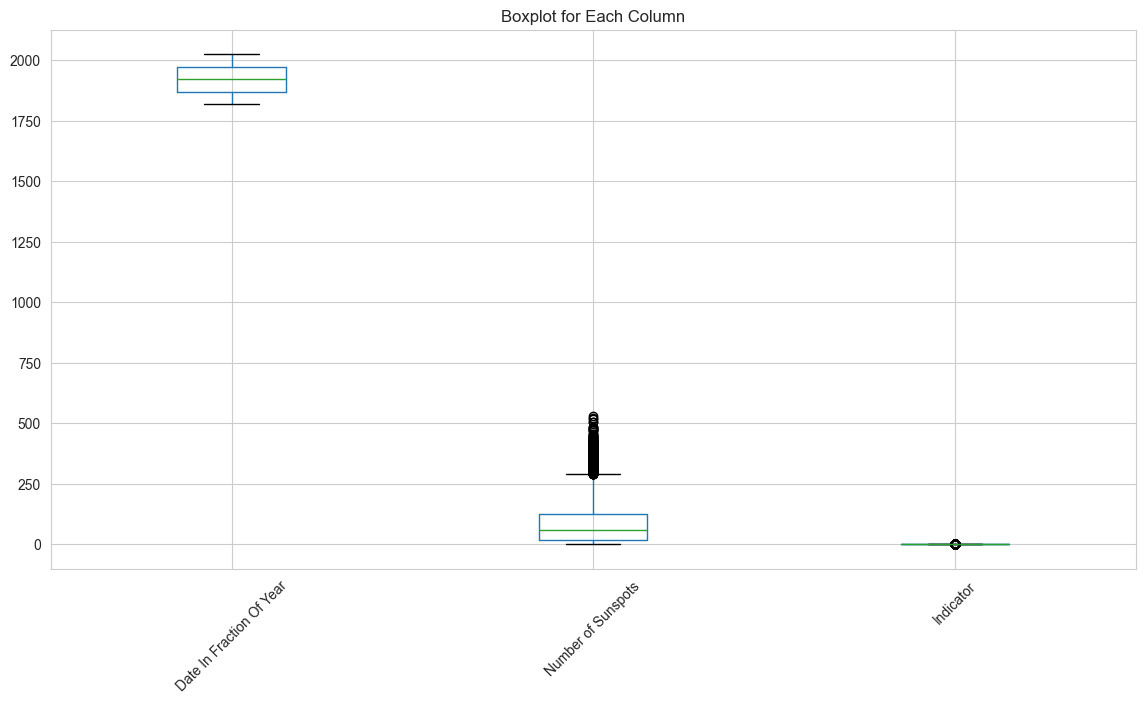

In [8]:
# Plot boxplot for each of the columns
plt.figure(figsize=(14, 7))
df.boxplot(column=['Date In Fraction Of Year', 'Number of Sunspots', 'Indicator'])
plt.title('Boxplot for Each Column')
plt.xticks(rotation=45)
plt.show()

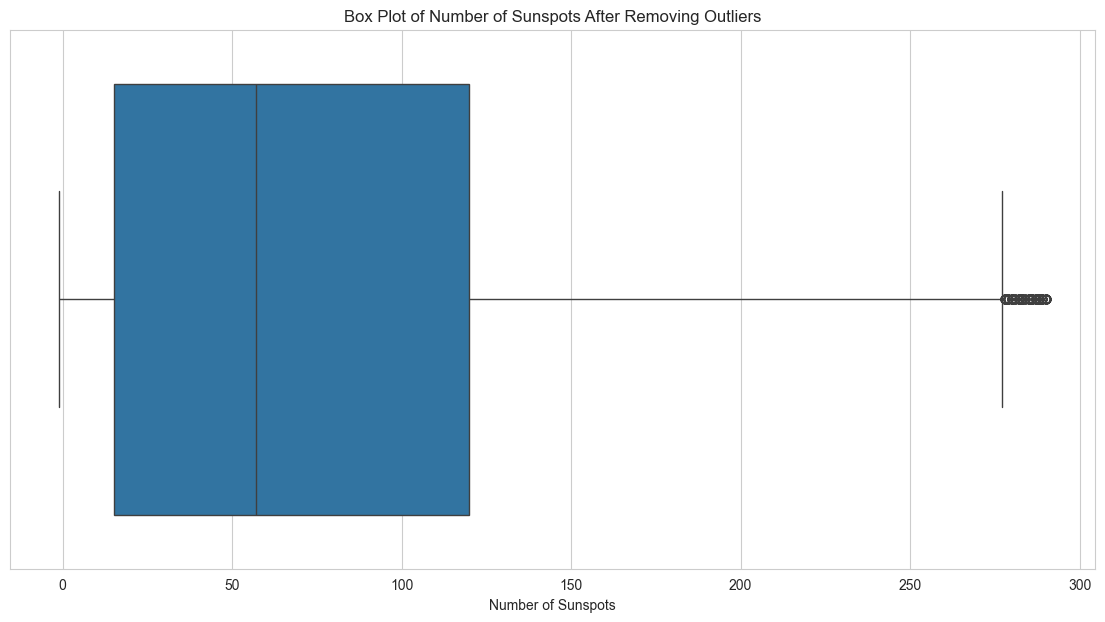

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Number of Sunspots'].quantile(0.25)
Q3 = df['Number of Sunspots'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['Number of Sunspots'] >= lower_bound) & (df['Number of Sunspots'] <= upper_bound)]

# Plot the box plot to see the result after removing outliers
plt.figure(figsize=(14, 7))
sns.boxplot(x='Number of Sunspots', data=df_no_outliers)
plt.title('Box Plot of Number of Sunspots After Removing Outliers')
plt.xlabel('Number of Sunspots')
plt.show()

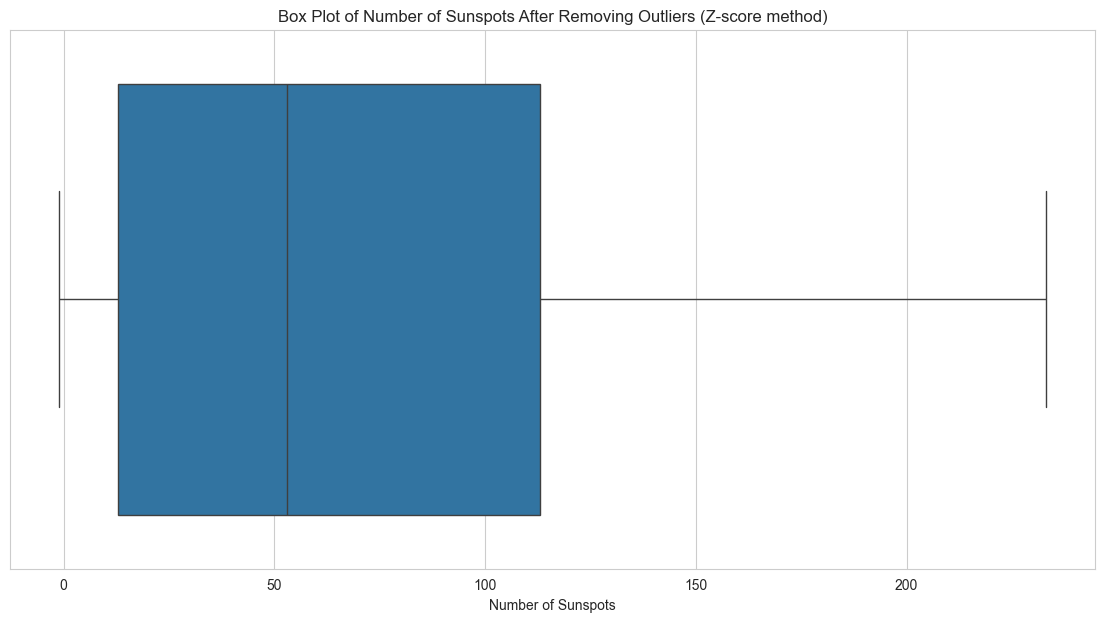

In [10]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the Z-scores of the Number of Sunspots column
z_scores = stats.zscore(df['Number of Sunspots'])

# Define a threshold for the Z-score
threshold = 2

# Remove outliers
df_no_outliers_z = df[(z_scores < threshold) & (z_scores > -threshold)]

# Plot the box plot to see the result after removing outliers
plt.figure(figsize=(14, 7))
sns.boxplot(x='Number of Sunspots', data=df_no_outliers_z)
plt.title('Box Plot of Number of Sunspots After Removing Outliers (Z-score method)')
plt.xlabel('Number of Sunspots')
plt.show()

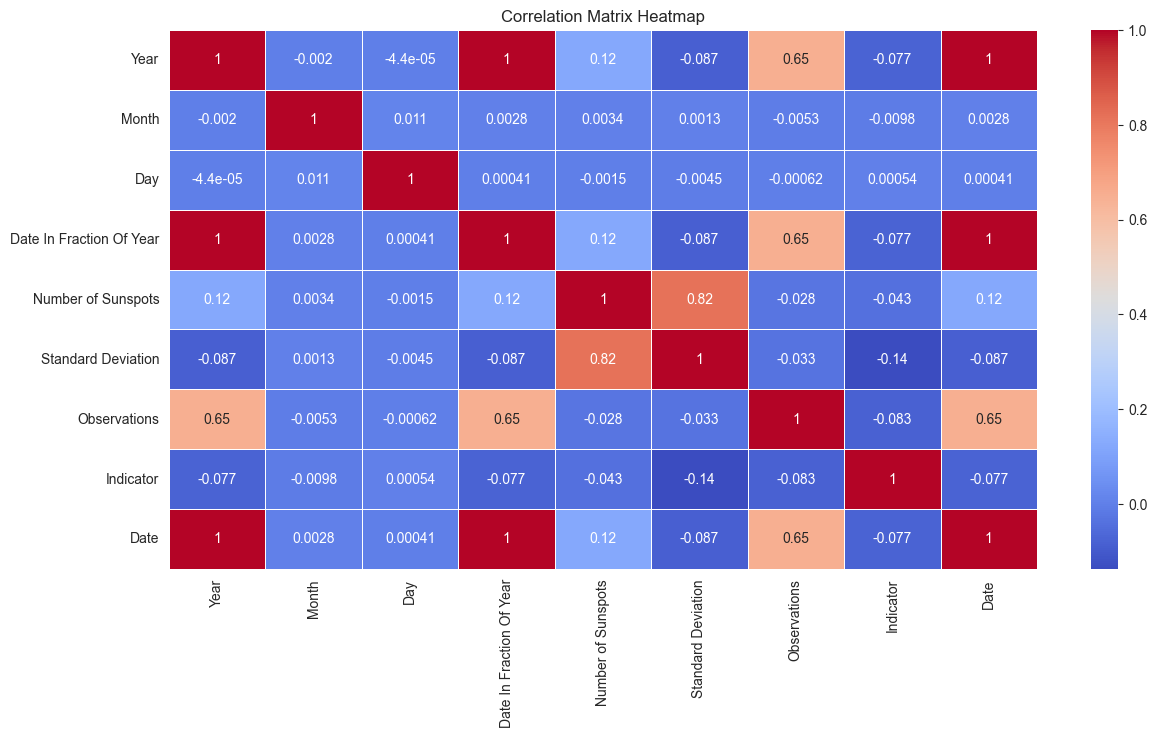

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, LSTM # type: ignore

# Select the 'Number of Sunspots' column
data = df[['Number of Sunspots']].values

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define a function to create sequences of data
def create_sequences(dataset, look_back=30):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back])
        y.append(dataset[i+look_back])
    return np.array(X), np.array(y)

look_back = 30
X_all, y_all = create_sequences(data_scaled, look_back=look_back)

# Split into train and test
train_size = int(len(X_all) * 0.8)
X_train, X_test = X_all[:train_size], X_all[train_size:]
y_train, y_test = y_all[:train_size], y_all[train_size:]


In [13]:
from tensorflow.keras.layers import Input # type: ignore

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(look_back, 1)))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, 
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0077 - val_loss: 0.0011
Epoch 2/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0038 - val_loss: 0.0011
Epoch 3/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0037 - val_loss: 9.4157e-04
Epoch 4/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0036 - val_loss: 7.9138e-04
Epoch 5/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0036 - val_loss: 7.8078e-04
Epoch 6/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0036 - val_loss: 9.9398e-04
Epoch 7/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0037 - val_loss: 7.6043e-04
Epoch 8/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0037 - val_loss: 7.5416e-04
Epoch 9/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0036 - val_loss: 7.5008e-04
Epoch 10/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0035 - val_loss: 7.5783e-04


In [15]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
# Inverse-transform actual values for comparison
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

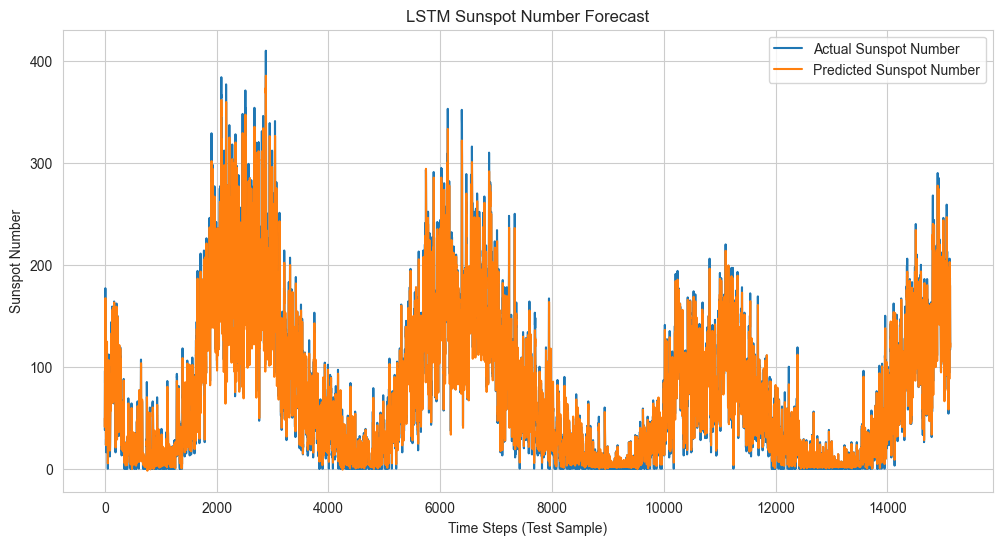

In [17]:
# Plot results
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual Sunspot Number')
plt.plot(predictions, label='Predicted Sunspot Number')
plt.title('LSTM Sunspot Number Forecast')
plt.xlabel('Time Steps (Test Sample)')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(actual, predictions)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 212.07257631665402
Root Mean Squared Error (RMSE): 14.562711846241209


In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # type: ignore

# Define the time series generator
look_back = 30
batch_size = 32

train_generator = TimeseriesGenerator(data_scaled, data_scaled, length=look_back, batch_size=batch_size)
test_generator = TimeseriesGenerator(data_scaled, data_scaled, length=look_back, batch_size=batch_size, start_index=train_size)

# Build the LSTM model
model = Sequential()
model.add(tf.keras.layers.Input(shape=(look_back, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator, verbose=1)

# Make predictions
predictions = model.predict(test_generator)
predictions = scaler.inverse_transform(predictions)

# Inverse-transform actual values for comparison
actual = scaler.inverse_transform(data_scaled[train_size + look_back:])

Epoch 1/10


c:\Users\XT\AppData\Local\Programs\Python\Python312\genv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2364/2364 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0056 - val_loss: 0.0013
Epoch 2/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0035 - val_loss: 9.5057e-04
Epoch 3/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0035 - val_loss: 8.0525e-04
Epoch 4/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0032 - val_loss: 9.2666e-04
Epoch 5/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0030 - val_loss: 8.3861e-04
Epoch 6/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 7/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0029 - val_loss: 7.2587e-04
Epoch 8/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0030 - val_loss: 7.5723e-04
Epoch 9/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0031 - val_loss: 7.2939e-04
Epoch 10/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0032 - val_loss: 7.2690e-04
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


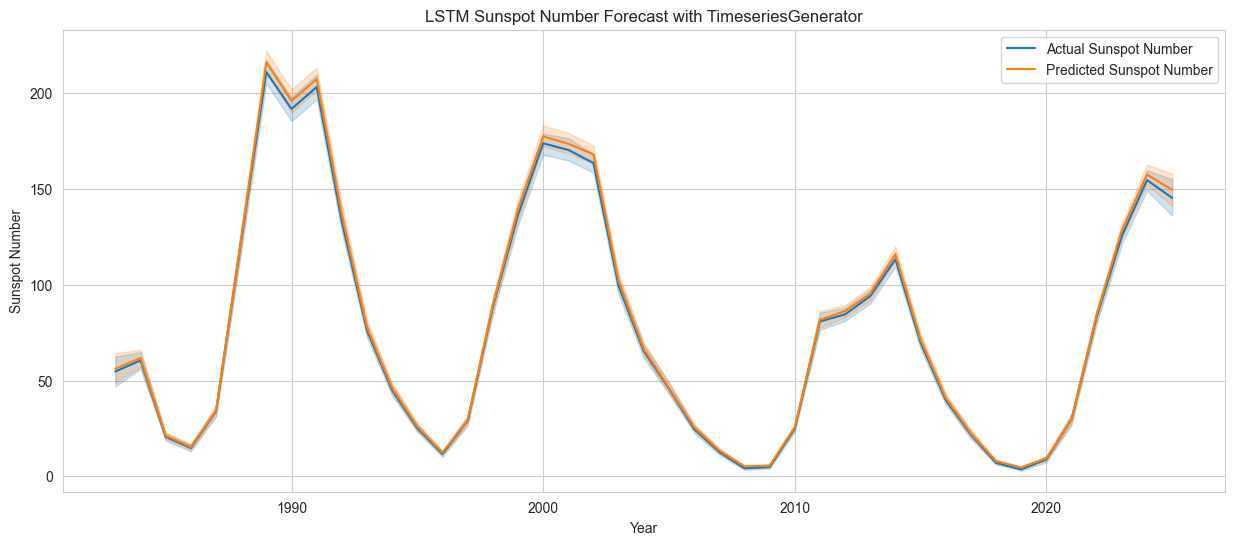

In [20]:
# Plot results using seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x=df['Year'][-len(actual):], y=actual.flatten(), label='Actual Sunspot Number')
sns.lineplot(x=df['Year'][-len(predictions):], y=predictions.flatten(), label='Predicted Sunspot Number')
plt.title('LSTM Sunspot Number Forecast with TimeseriesGenerator')
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

In [21]:
# Define the time_step (look-back period), e.g., 30 days
time_step = 30

# Predict the next 2 years (assuming daily data, 2 years = 730 days)
future_steps = 730

# Get the last time_step data points from the scaled data
last_data = data_scaled[-time_step:]

# Initialize the list to store future predictions
future_predictions = []

# Predict future values
for _ in range(future_steps):
    # Reshape the last_data to match the input shape of the model
    last_data_reshaped = last_data.reshape((1, time_step, 1))
    
    # Predict the next value
    next_value = model.predict(last_data_reshaped)
    
    # Append the predicted value to the future_predictions list
    future_predictions.append(next_value[0, 0])
    
    # Update the last_data by appending the predicted value and removing the first value
    last_data = np.append(last_data[1:], next_value, axis=0)

# Inverse transform the future predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a date range for the future predictions starting one day after the last date
last_date = df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

# Create a DataFrame for the future predictions
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted Sunspot Number'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

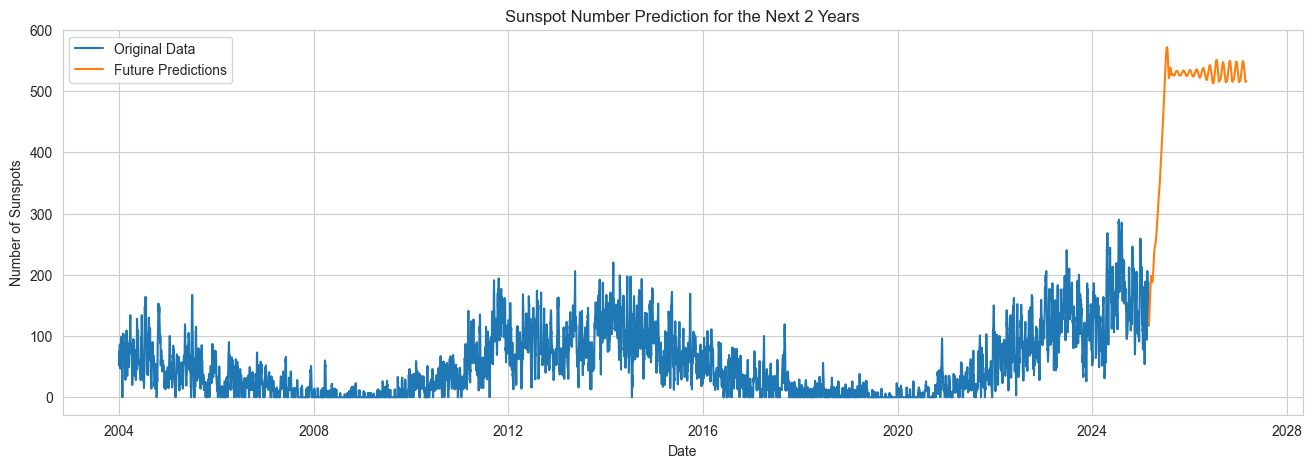

In [22]:
# Plot the future predictions using seaborn
# Filter the original data to include only dates from 1920 onwards
filtered_df = df[df['Date'] >= '2004-01-01']

# Plot the future predictions using seaborn
plt.figure(figsize=(16, 5))
sns.lineplot(x=filtered_df['Date'], y=filtered_df['Number of Sunspots'], label='Original Data')
sns.lineplot(x=future_df.index, y=future_df['Predicted Sunspot Number'], label='Future Predictions')
plt.title('Sunspot Number Prediction for the Next 2 Years')
plt.xlabel('Date')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.show()

In [23]:
# Calculate the MSE of LSTM model
mse = mean_squared_error(actual, predictions)

# Calculate the RMSE of LSTM model
rmse = np.sqrt(mse)

# Calculate the Mean Absolute Error (MAE) of LSTM model
mae = np.mean(np.abs(actual - predictions))

# Calculate the R-squared score of LSTM model
r2_score = 1 - (np.sum((actual - predictions) ** 2) / np.sum((actual - np.mean(actual)) ** 2))

# Calculate the residuals
residuals = np.abs(actual - predictions)

# Calculate the Explained Variance Score of LSTM model
explained_variance = 1 - (np.var(actual - predictions) / np.var(actual))

print('---------------------------------------------------')
print('Evaluation Metrics for LSTM Model')
print(f'R-Squared Score: {r2_score}')
print(f'Residuals: {residuals}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Explained Variance Score: {explained_variance}')
print('---------------------------------------------------')

---------------------------------------------------
Evaluation Metrics for LSTM Model
R-Squared Score: 0.9606274035642962
Residuals: [[10.99348831]
 [24.53388977]
 [12.97978973]
 ...
 [42.83279419]
 [ 5.73001862]
 [16.14424133]]
Mean Absolute Error (MAE): 10.101772312055445
Mean Squared Error (MSE): 203.41552341732134
Root Mean Squared Error (RMSE): 14.262381407651436
Explained Variance Score: 0.9611703033033215
---------------------------------------------------


In [24]:
# Calculate the MSE of future predictions
future_mse = mean_squared_error(filtered_df['Number of Sunspots'].values[-future_steps:], future_predictions)

# Calculate the RMSE of future predictions
future_rmse = np.sqrt(future_mse)

# Calculate the Mean Absolute Error (MAE) of future predictions
future_mae = np.mean(np.abs(filtered_df['Number of Sunspots'].values[-future_steps:] - future_predictions))

# Calculate the R-squared score of future predictions
future_r2_score = 1 - (np.sum((filtered_df['Number of Sunspots'].values[-future_steps:] - future_predictions) ** 2) / np.sum((filtered_df['Number of Sunspots'].values[-future_steps:] - np.mean(filtered_df['Number of Sunspots'].values[-future_steps:])) ** 2))

# Calculate the residuals of future predictions
future_residuals = np.abs(filtered_df['Number of Sunspots'].values[-future_steps:] - future_predictions)

print('---------------------------------------------------')
print('Evaluation Metrics for Future Predictions')
print(f'Mean Squared Error (MSE) for Future Predictions: {future_mse}')
print(f'Root Mean Squared Error (RMSE) for Future Predictions: {future_rmse}')
print(f'Mean Absolute Error (MAE) for Future Predictions: {future_mae}')
print(f'R-Squared Score for Future Predictions: {future_r2_score}')
print(f'Residuals for Future Predictions: {future_residuals}')
print('---------------------------------------------------')

---------------------------------------------------
Evaluation Metrics for Future Predictions
Mean Squared Error (MSE) for Future Predictions: 133452.72153538378
Root Mean Squared Error (RMSE) for Future Predictions: 365.3118141196419
Mean Absolute Error (MAE) for Future Predictions: 352.1685630291527
R-Squared Score for Future Predictions: -41890.8875065658
Residuals for Future Predictions: [[1.86531754e+01 3.46824646e-01 8.34682465e+00 ... 5.34682465e+00
  1.13468246e+01 1.65317535e+00]
 [2.32427292e+01 4.24272919e+00 3.75727081e+00 ... 7.57270813e-01
  6.75727081e+00 6.24272919e+00]
 [2.86689606e+01 9.66896057e+00 1.66896057e+00 ... 4.66896057e+00
  1.33103943e+00 1.16689606e+01]
 ...
 [4.15285461e+02 3.96285461e+02 3.88285461e+02 ... 3.91285461e+02
  3.85285461e+02 3.98285461e+02]
 [4.15714172e+02 3.96714172e+02 3.88714172e+02 ... 3.91714172e+02
  3.85714172e+02 3.98714172e+02]
 [4.16175537e+02 3.97175537e+02 3.89175537e+02 ... 3.92175537e+02
  3.86175537e+02 3.99175537e+02]]
-----

06:43:31 - cmdstanpy - INFO - Chain [1] start processing
06:44:08 - cmdstanpy - INFO - Chain [1] done processing


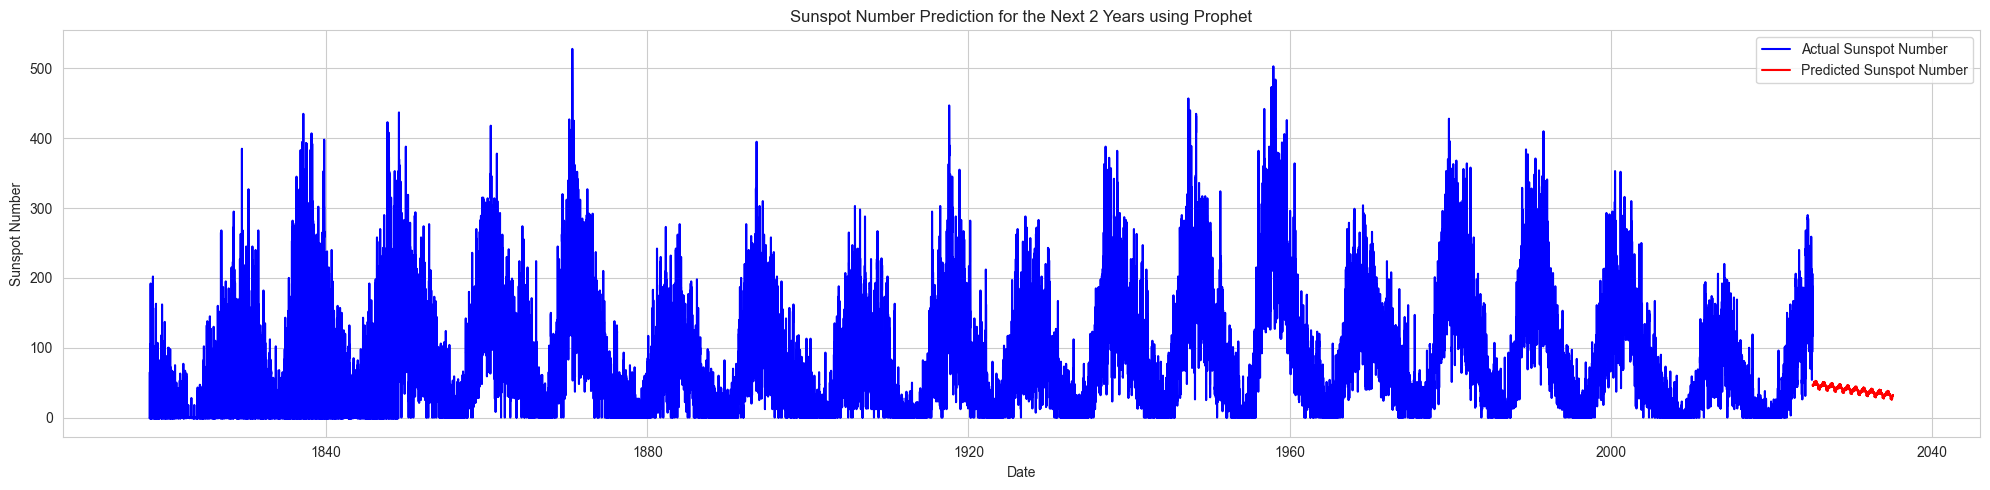

In [ ]:
from prophet import Prophet

# Prepare the data for Prophet
df_prophet = df[['Date', 'Number of Sunspots']].rename(columns={'Date': 'ds', 'Number of Sunspots': 'y'})

# Initialize the Prophet model
model_prophet = Prophet()

# Fit the model
model_prophet.fit(df_prophet)

# Make future dataframe for 10 years
future = model_prophet.make_future_dataframe(periods=3650)

# Predict the future
forecast = model_prophet.predict(future)

# Plot the actual and predicted values
plt.figure(figsize=(20, 5))

# Plot actual values from the original dataframe up to the last date in the original data
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual Sunspot Number', color='blue')

# Plot predicted values starting from the day after the last date in the original data
plt.plot(forecast['ds'][df_prophet.shape[0]:], forecast['yhat'][df_prophet.shape[0]:], 
         label='Predicted Sunspot Number', color='red')

# Set plot title and labels
plt.title('Sunspot Number Prediction for the Next 2 Years using Prophet')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')

# Add legend
plt.legend()
plt.tight_layout()
# Show plot
plt.show()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

def mean_absolute_scaled_error(y_true, y_pred, y_train, mae_train):
    n = len(y_true)
    d = np.abs(np.diff(y_train)).sum() / (len(y_train) - 1)
    errors = np.abs(y_true - y_pred)
    return errors.mean() / d

# Calculate the Mean Squared Error (MSE) for Prophet
mse_prophet = mean_squared_error(df_prophet['y'], forecast['yhat'][:df_prophet.shape[0]])
print('Mean Squared Error (MSE) for Prophet:', mse_prophet)

# Calculate the Mean Absolute Error (MAE) for Prophet
mae_prophet = mean_absolute_error(df_prophet['y'], forecast['yhat'][:df_prophet.shape[0]])
print('Mean Absolute Error (MAE) for Prophet:', mae_prophet)

# Calculate the Root Mean Squared Error (RMSE) for Prophet
rmse_prophet = np.sqrt(mse_prophet)
print('Root Mean Squared Error (RMSE) for Prophet:', rmse_prophet)

# Calculate the Mean Absolute Scaled Error (MASE) for Prophet
mase_prophet = mean_absolute_scaled_error(df_prophet['y'], forecast['yhat'][:df_prophet.shape[0]], 
                                          df_prophet['y'].shift(1).dropna(), mae_prophet)
print('Mean Absolute Scaled Error (MASE) for Prophet:', mase_prophet)

# Calculate the R-squared value for Prophet
r2_prophet = r2_score(df_prophet['y'], forecast['yhat'][:df_prophet.shape[0]])
print('R-squared value for Prophet:', r2_prophet)

# Calculate the Explained Variance Score for Prophet
evs_prophet = explained_variance_score(df_prophet['y'], forecast['yhat'][:df_prophet.shape[0]])
print('Explained Variance Score for Prophet:', evs_prophet)

Mean Squared Error (MSE) for Prophet: 5081.905283032244
Mean Absolute Error (MAE) for Prophet: 57.09709439419551
Root Mean Squared Error (RMSE) for Prophet: 71.2874833545991
Mean Absolute Scaled Error (MASE) for Prophet: 3.2675809953461257
R-squared value for Prophet: 0.1476005202079712
Explained Variance Score for Prophet: 0.1476005202952123
